In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Convert numerical and Categorical columns**

In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**prevailing_wage**

In [4]:
visa_df.loc[:'prevailing_wage']
visa_df.iloc[:,[8]]
visa_df['prevailing_wage']
visa_df[['prevailing_wage']]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


- len
- min
- max
- average(mean)
- standard deviation std
- median
- 25p
- 50p
- 75p

In [5]:
len(visa_df['prevailing_wage'])

25480

**min**

In [6]:
min(visa_df['prevailing_wage'])

2.1367

**max**

In [7]:
max(visa_df['prevailing_wage'])

319210.27

In [8]:
count=len(visa_df['prevailing_wage'])
min_wage=min(visa_df['prevailing_wage'])
max_wage=max(visa_df['prevailing_wage'])
print("the number of wage samples are:",count)
print("the minimum wage is:",min_wage)
print("the maximum eage is:", max_wage)

the number of wage samples are: 25480
the minimum wage is: 2.1367
the maximum eage is: 319210.27


**mean**

In [9]:
(visa_df[['prevailing_wage']].mean())

prevailing_wage    74455.814592
dtype: float64

In [10]:
visa_df['prevailing_wage'].mean()

74455.81459209183

**median**

In [11]:
visa_df['prevailing_wage'].median()

70308.20999999999

In [12]:
mean_wage=round(visa_df['prevailing_wage'].mean(),2)
median_wage=round(visa_df['prevailing_wage'].median(),2)
print("the average wage is:",mean_wage)
print("the median wage is:",median_wage)

the average wage is: 74455.81
the median wage is: 70308.21


- mode is not suitable metric for numeric analysis
- differnt observation can have same value

**using numpy**

In [13]:
np.mean(visa_df['prevailing_wage'])

74455.81459209183

In [15]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

**Standard Deviation STD**

In [16]:
(visa_df['prevailing_wage'].std())

52815.94232687357

In [17]:
std_wage=round(visa_df['prevailing_wage'].std(),2)
std_wage

52815.94

In [18]:
count=len(visa_df['prevailing_wage'])
min_wage=min(visa_df['prevailing_wage'])
max_wage=max(visa_df['prevailing_wage'])
mean_wage=round(visa_df['prevailing_wage'].mean(),2)
median_wage=round(visa_df['prevailing_wage'].median(),2)
std_wage=round(visa_df['prevailing_wage'].std(),2)

In [19]:
# step-1: create empty list ,keep all the values in a list
# step02: create a index list=['count','min','max']
# step-4: create a cols list=['pwage']
values=[count,min_wage,max_wage,mean_wage,median_wage,std_wage]
index=['count','min','max','mean','median','std']
cols=['prevailing_wage']
pd.DataFrame(values,index=index,columns=cols)

,prevailing_wage
count,25480.0000
min,2.1367
max,319210.2700
mean,74455.8100
median,70308.2100
std,52815.9400


In [20]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**25p-50p-75p**

**percentile**

- in numpy we have percentile

- the method is np.percentile()

        - it takes the two arguments
  
        - a: array means data
  
        - q value which percentile data we want, that value we need to provide
  
        - if we want 25p value then q=25

**quantile**

- in numpy we have quantile

- the method is np.quantile()

        - it takes the two arguments
  
        - a: array means data
  
        - q value which percentile data we want, that value we need to provide
  
        - if we want 25p value then q=0.25
  
        - if we want 50p value then q=0.50

In [21]:
np.percentile(visa_df['prevailing_wage'],25)

34015.479999999996

In [22]:
np.percentile(visa_df['prevailing_wage'],30)

42032.848999999995

In [23]:
np.quantile(visa_df['prevailing_wage'],0.25)

34015.479999999996

In [24]:
np.quantile(visa_df['prevailing_wage'],0.50)

70308.20999999999

In [25]:
np.quantile(visa_df['prevailing_wage'],0.30)

42032.848999999995

In [26]:
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)
print("25p  is:",wage_25p)
print("50p value is:",wage_50p)
print("75p value is:",wage_75p)

25p  is: 34015.48
50p value is: 70308.21
75p value is: 107735.51


In [27]:
values=[count,min_wage,max_wage,mean_wage,median_wage,std_wage,wage_25p,wage_50p,wage_75p]
index=['count','min','max','mean','median','std','25p','50p','75p']
cols=['prevailing_wage']
pd.DataFrame(values,index=index,columns=cols)

,prevailing_wage
count,25480.0000
min,2.1367
max,319210.2700
mean,74455.8100
median,70308.2100
std,52815.9400
25p,34015.4800
50p,70308.2100
75p,107735.5100


In [28]:
df1=pd.DataFrame()
for i in num_columns:
    count=len(visa_df[i])
    min_wage=min(visa_df[i])
    max_wage=max(visa_df[i])
    mean_wage=round(visa_df[i].mean(),2)
    median_wage=round(visa_df[i].median(),2)
    std_wage=round(visa_df[i].std(),2)
    wage_25p=round(np.percentile(visa_df[i],25),2)
    wage_50p=round(np.percentile(visa_df[i],50),2)
    wage_75p=round(np.percentile(visa_df[i],75),2)
    values=[count,min_wage,max_wage,
            mean_wage,median_wage,std_wage,wage_25p,wage_50p,wage_75p]
    index=['count','min','max','mean','median','std','25p','50p','75p']
    cols=[i]
    df2=pd.DataFrame(values,index=index,columns=cols)
    df1=pd.concat([df1,df2],axis=1)

In [29]:
df1

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.0000
min,-26.00,1800.00,2.1367
max,602069.00,2016.00,319210.2700
mean,5667.04,1979.41,74455.8100
median,2109.00,1997.00,70308.2100
std,22877.93,42.37,52815.9400
25p,1022.00,1976.00,34015.4800
50p,2109.00,1997.00,70308.2100
75p,3504.00,2005.00,107735.5100


In [30]:
# import the packages
# and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**percentiles**

- 25p:

    - assume that 25p value=x

    - 25p of data less than that value:x

- for example prevailing_wage 25p value is: 34015.47

- 25 percentage of people having salary less than 34015.47

- total numbers: 25480

- 25 percentage of 25480=6370

- which means 6370 people has salary less than 34015.47 

In [31]:
np.percentile(visa_df['prevailing_wage'],25)

34015.479999999996

In [32]:
25*25480/100

6370.0

In [33]:
# step-1: read the prevailing wage
# step-2: provide the condition
#         prevailing wage < percentile value

wage_data=visa_df['prevailing_wage']
p_25=np.percentile(visa_df['prevailing_wage'],25)
con=wage_data<p_25
len(visa_df[con])

6370

- 50p:

    - assume that 50p value=x

    - 50p of data less than that value:x

- for example prevailing_wage 50p value is: 70308

- 50 percentage of people having salary less than 70308

- total numbers: 25480

- 50 percentage of 25480=12740

- which means 12740 people has salary less than 70308

In [34]:
wage_data=visa_df['prevailing_wage']
p_50=np.percentile(visa_df['prevailing_wage'],50)
con=wage_data<p_50
len(visa_df[con])

12740

In [35]:
wage_data=visa_df['prevailing_wage']
p_75=np.percentile(visa_df['prevailing_wage'],75)
con=wage_data<p_75
len(visa_df[con])

19110

In [36]:
wage_data=visa_df['prevailing_wage']
p_30=np.percentile(visa_df['prevailing_wage'],30)
con=wage_data<p_30
len(visa_df[con])

7644

**Emperical rule**

- mean-1std to mean+1std:68%
- mean-2std to mean+2std:95%
- mean-3std to mean+3std:99.7%

In [37]:
# step-1: calculate the means of prevailing wage 
# step-2: calculatte the std of prevailing wage
# step-3: lb=mean-1*std]
# step-4: ub=mean+1*std
# step-5: con1=data<ub
# step-6: con2=data>ub
# step-7: con3= con1and con2
# step-8: data[con3]

# step-9: compare with 68% 25480 count

mu=visa_df['prevailing_wage'].mean()
sigma= visa_df['prevailing_wage'].std()
lb=mu-1*sigma
ub=mu+1*sigma
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))
print(68*len(visa_df)/100)

17171
17326.4


In [38]:
mu=visa_df['prevailing_wage'].mean()
sigma= visa_df['prevailing_wage'].std()
lb=mu-2*sigma
ub=mu+2*sigma
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))
print(95*len(visa_df)/100)

24582
24206.0


In [39]:
mu=visa_df['prevailing_wage'].mean()
sigma= visa_df['prevailing_wage'].std()
lb=mu-3*sigma
ub=mu+3*sigma
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))
print(99.7*len(visa_df)/100)

25186
25403.56


In [40]:
# import the packages
# read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**describe**

In [41]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histograme**

- by applying imperical rule we obsedved slight deviatoion in the count of data

- also mean is slight deviation from median

- this gives an indication the data does not follows normal distribution 

- to understand more clarity will visualize data

- its is numericqal data to plot name is **histograme**

- histograme is a graph between class intervals and class interval frequency

- the plot is available is **matplotlib**

- the method name is **hist**

(array([3863., 2175., 2676., 2828., 2889., 2792., 2485., 2066., 1452.,
         882.,  408.,  216.,  206.,  167.,  129.,  111.,   66.,   48.,
          10.,   11.]),
 array([2.13670000e+00, 1.59625434e+04, 3.19229500e+04, 4.78833567e+04,
        6.38437634e+04, 7.98041700e+04, 9.57645767e+04, 1.11724983e+05,
        1.27685390e+05, 1.43645797e+05, 1.59606203e+05, 1.75566610e+05,
        1.91527017e+05, 2.07487423e+05, 2.23447830e+05, 2.39408237e+05,
        2.55368643e+05, 2.71329050e+05, 2.87289457e+05, 3.03249863e+05,
        3.19210270e+05]),
 <BarContainer object of 20 artists>)

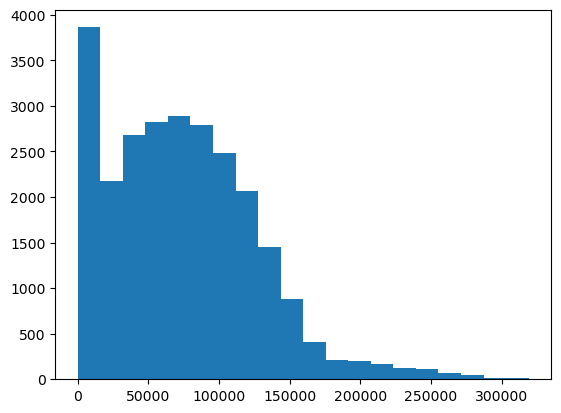

In [42]:
# step-1: read the previling wage
# step-2: plt.hist()

wage_data=visa_df['prevailing_wage']
plt.hist(wage_data,bins=20)

- histograme will retun 3 values

    - interval count array

        - we have 20 interval, so we have 20 interval counts

    - bins

        - bins means number of intervals

        - we have 20 intervals to need 21 values

    - we will display how many intervakls are available 

- for examplenin the bins array the first two forms one interval

- 2.136 to 15952.543 the count is 3863

- 3863 observations are avialable between 2.136 to 15962.543

- similarly 2175 observations are available between (15962.543,31922.95)

In [43]:
 1.59625434e+04

15962.5434

In [44]:
 1.59625434e+04, 3.19229500e+04

(15962.5434, 31922.95)

20
21
<BarContainer object of 20 artists>


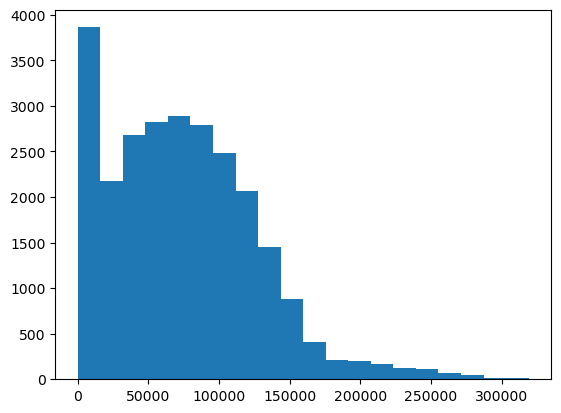

In [45]:
wage_data=visa_df['prevailing_wage']
count,bins,x=plt.hist(wage_data,bins=20)
print(len(count))
print(len(bins))
print(x)

**verify below two statements**

- 3863 observations are avialable between 2.136 to 15962.543

- similarly 2175 observations are available between (15962.543 to 31922.95)

In [46]:
lb=2.136
ub=15962.543
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
len(visa_df[con3])

3863

In [47]:
lb=1.59625434e+04
ub=3.19229500e+04
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))

2175


In [48]:
count

array([3863., 2175., 2676., 2828., 2889., 2792., 2485., 2066., 1452.,
        882.,  408.,  216.,  206.,  167.,  129.,  111.,   66.,   48.,
         10.,   11.])

In [49]:
bins

array([2.13670000e+00, 1.59625434e+04, 3.19229500e+04, 4.78833567e+04,
       6.38437634e+04, 7.98041700e+04, 9.57645767e+04, 1.11724983e+05,
       1.27685390e+05, 1.43645797e+05, 1.59606203e+05, 1.75566610e+05,
       1.91527017e+05, 2.07487423e+05, 2.23447830e+05, 2.39408237e+05,
       2.55368643e+05, 2.71329050e+05, 2.87289457e+05, 3.03249863e+05,
       3.19210270e+05])

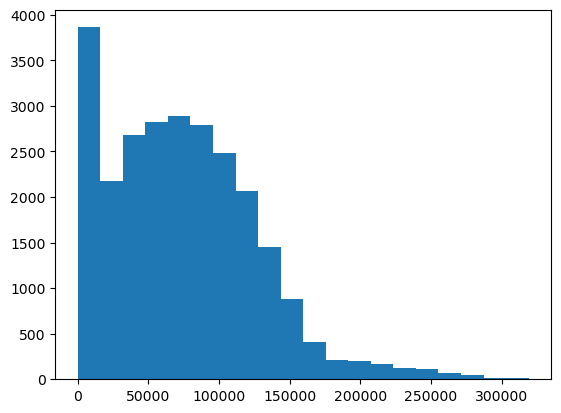

In [50]:
count,bins,x=plt.hist(wage_data,bins=20)

In [51]:
data=[]
for i in range(len(bins)-1):
    lb=bins[i]
    ub=bins[i+1]
    con1=visa_df['prevailing_wage'] <lb
    con2=visa_df['prevailing_wage'] <ub
    con3=con1 & con2
    data.append((lb,ub, round(len(visa_df[con3]))))

pd.DataFrame(data,columns=['lb','ub','count'])

,lb,ub,count
0,2.136700,15962.543365,0
1,15962.543365,31922.950030,3863
2,31922.950030,47883.356695,6038
3,47883.356695,63843.763360,8714
4,63843.763360,79804.170025,11542
5,79804.170025,95764.576690,14431
6,95764.576690,111724.983355,17223
7,111724.983355,127685.390020,19708
8,127685.390020,143645.796685,21774
9,143645.796685,159606.203350,23226


**draw the histogram using seaborn try at home**